In [58]:
import pandas as pd
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, Lambda, LSTM
from keras.optimizers import RMSprop
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('ppm.csv')

In [9]:
data = data.drop(data.columns[0], axis = 1)

In [23]:
dataset = data.values[:-1]

In [24]:
dataset

array([['319.32'],
       ['320.36'],
       ['320.82'],
       ['322.06'],
       ['322.17'],
       ['321.95'],
       ['321.20'],
       ['318.81'],
       ['317.82'],
       ['317.37'],
       ['318.93'],
       ['319.09'],
       ['319.94'],
       ['320.98'],
       ['321.81'],
       ['323.03'],
       ['323.36'],
       ['323.11'],
       ['321.65'],
       ['319.64'],
       ['317.86'],
       ['317.25'],
       ['319.06'],
       ['320.26'],
       ['321.65'],
       ['321.81'],
       ['322.36'],
       ['323.67'],
       ['324.17'],
       ['323.39'],
       ['321.93'],
       ['320.29'],
       ['318.58'],
       ['318.60'],
       ['319.98'],
       ['321.25'],
       ['321.88'],
       ['322.47'],
       ['323.17'],
       ['324.23'],
       ['324.88'],
       ['324.75'],
       ['323.47'],
       ['321.34'],
       ['319.56'],
       ['319.45'],
       ['320.45'],
       ['321.92'],
       ['323.40'],
       ['324.21'],
       ['325.33'],
       ['326.31'],
       ['327

In [25]:
dataset = dataset.astype('float32')

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [28]:
dataset = scaler.fit_transform(dataset)

In [31]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [37]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [38]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [39]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [44]:
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1s - loss: 0.0639
Epoch 2/100
0s - loss: 0.0193
Epoch 3/100
0s - loss: 0.0156
Epoch 4/100
0s - loss: 0.0135
Epoch 5/100
0s - loss: 0.0116
Epoch 6/100
0s - loss: 0.0102
Epoch 7/100
0s - loss: 0.0085
Epoch 8/100
0s - loss: 0.0076
Epoch 9/100
0s - loss: 0.0068
Epoch 10/100
0s - loss: 0.0063
Epoch 11/100
0s - loss: 0.0060
Epoch 12/100
0s - loss: 0.0059
Epoch 13/100
0s - loss: 0.0058
Epoch 14/100
0s - loss: 0.0057
Epoch 15/100
0s - loss: 0.0056
Epoch 16/100
0s - loss: 0.0056
Epoch 17/100
0s - loss: 0.0057
Epoch 18/100
0s - loss: 0.0055
Epoch 19/100
0s - loss: 0.0055
Epoch 20/100
0s - loss: 0.0055
Epoch 21/100
0s - loss: 0.0055
Epoch 22/100
0s - loss: 0.0055
Epoch 23/100
0s - loss: 0.0053
Epoch 24/100
0s - loss: 0.0055
Epoch 25/100
0s - loss: 0.0053
Epoch 26/100
0s - loss: 0.0054
Epoch 27/100
0s - loss: 0.0052
Epoch 28/100
0s - loss: 0.0052
Epoch 29/100
0s - loss: 0.0051
Epoch 30/100
0s - loss: 0.0050
Epoch 31/100
0s - loss: 0.0053
Epoch 32/100
0s - loss: 0.0050
Epoch 33/100
0s -

In [50]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [51]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [52]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.76 RMSE
Test Score: 1.00 RMSE


In [54]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [56]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


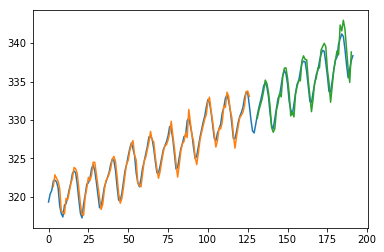

In [59]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()